# Making an animated plot

This code started from http://matplotlib.org/examples/animation/animate_decay.html with additions from https://github.com/jupyterlab/jupyterlab/issues/4492 when the original stopped working 2018-10-23. I'm not sure where to take this one from here for a useful application.

The extra plot probably is a result of Jupyter switching over to automatically include inline plots.

Note that this example goes the more complex route of creating a figure with axes and line sets, which goes beyond the simple examples in LS 1.6.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


In [2]:
def data_gen(t=0):      # generates a time sequence to feed the animation
    cnt = 0             # tuple of two or more values, but first always time in s
    while cnt < 200:    # and you don't have to take them all
        cnt += 1
        t += dt
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.) #was a tuple in the original

In [3]:
def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

In [4]:
def run(data):
    # update the data
    t = data[0]
    #y = data[1]
    y = np.sin(2*np.pi*t) * np.exp(-t/100.)
    xdata.append(t)
    z = np.sin(np.pi*t)
    zdata.append(z)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()
    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)
    line2[0].set_data(xdata, zdata)
    plt.xlabel("Time [s]")
    plt.ylabel("Value [-]")

        
    return line,

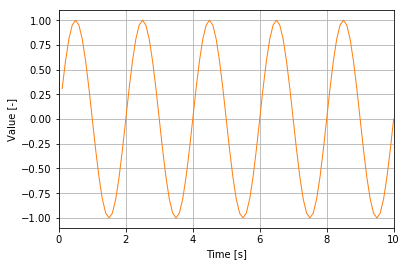

In [8]:
fig, ax = plt.subplots()        # return is a tuple unpacked by the comma
line, = ax.plot([], [], lw=2)   # lets us refer simply to line (the comma...)
line2 = ax.plot([], [], lw=1)   # requires that line2[0] carry an index
ax.grid()
xdata, ydata, zdata = [], [], []
dt = 0.1

# set up the whole animation
ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10/dt,
                              repeat=False, init_func=init)

# Originally plt.show worked here, but stopped 
#plt.show()    #then make the plot visible

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='jshtml')
rc

HTML(ani.to_jshtml())